In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\shrouk\Desktop\IRIS.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
print(df.duplicated().sum())
df=df.drop_duplicates()


3


In [16]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
### detect outliers by IQR{sepal_length}

q1 = df['sepal_length'].quantile(0.25)
q3 = df['sepal_length'].quantile(0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print("Q1 (25%) =" ,q1 ,"   ","Q3 (75%) =" ,q3,"   ","IQR =" , iqr,"   ","lower =" ,lower ,"   ","upper =" ,upper)
outlier_array = []
number_of_outlier_element = 0
for item in df['sepal_length']:
    if(item < lower):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
    elif(item > upper):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
outlier_array.sort()
print("Number Of Outlier Element : ",number_of_outlier_element,"elements")
print("Number Of Non Outlier Element : ",(df['sepal_length'].count()-number_of_outlier_element),"elements")
print(f"Outliers is : {outlier_array}")

Q1 (25%) = 5.1     Q3 (75%) = 6.4     IQR = 1.3000000000000007     lower = 3.1499999999999986     upper = 8.350000000000001
Number Of Outlier Element :  0 elements
Number Of Non Outlier Element :  147 elements
Outliers is : []


Text(0.5, 1.0, 'petal_width')

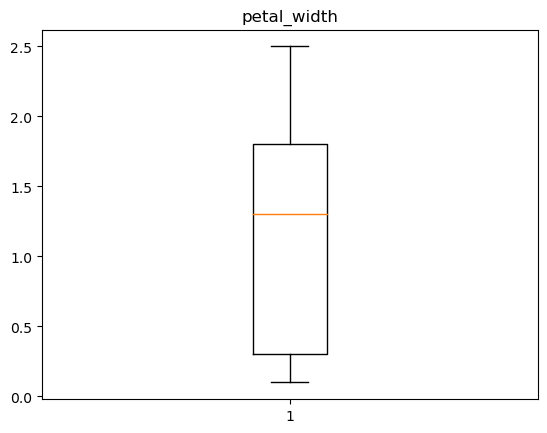

In [18]:
### detect outliers by box plot{sepal_width}
plt.boxplot(df['petal_width'])
plt.title('petal_width')

Text(0.5, 1.0, 'petal_length')

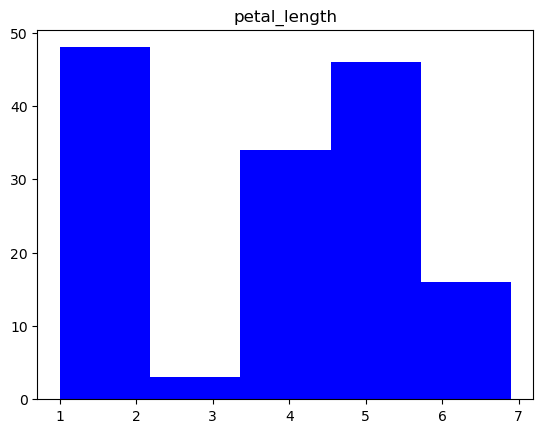

In [20]:
### detect outliers by histogram{petal_length}
plt.hist(df.petal_length ,bins=5 , color= 'blue')
plt.title('petal_length')
# not normal distribution

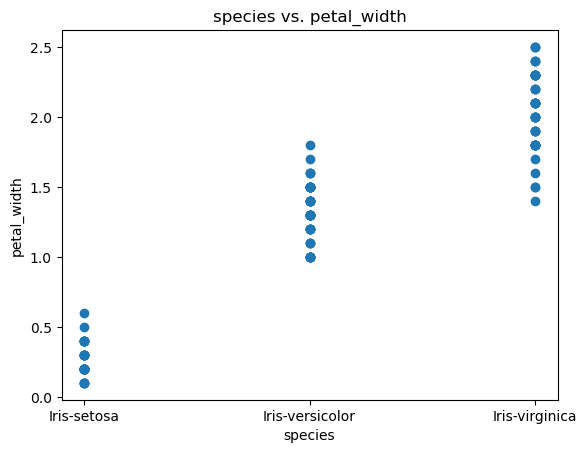

In [21]:
### detect outliers by scatter plot{petal_width}
plt.scatter(x='species', y='petal_width', data=df)
plt.title('species vs. petal_width')
plt.xlabel('species')
plt.ylabel('petal_width')
plt.show()

In [22]:
df['species']=pd.factorize(df['species'])[0]
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
x= df.drop(['species'], axis=1)
y=df.species
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
print(x.shape)
print(y.shape)

(147, 4)
(147,)


In [25]:
#implement GNB Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nv=GaussianNB()
nv.fit(x_train,y_train)
predict=nv.predict(x_test)
accuracy_score(y_test,predict)


0.9777777777777777

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[17,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 15]], dtype=int64)

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [36]:
predict=dtree.predict(x_test)
accuracy_score(y_test,predict)


0.9333333333333333

[Text(0.4, 0.9, 'petal_width <= 0.8\ngini = 0.664\nsamples = 102\nvalue = [31, 38, 33]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.7, 'petal_length <= 4.95\ngini = 0.498\nsamples = 71\nvalue = [0, 38, 33]'),
 Text(0.2, 0.5, 'petal_width <= 1.7\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.3, 'sepal_length <= 5.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5, 'petal_length <= 5.05\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.7, 0.3, 'sepal_length <= 6.35\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

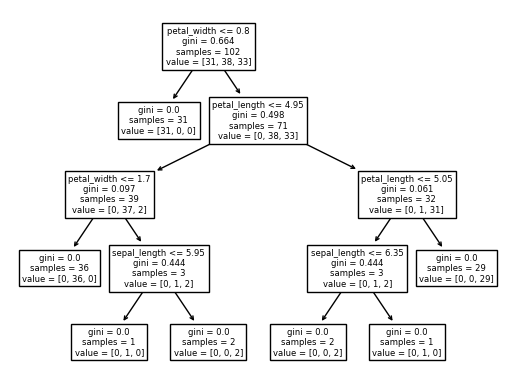

In [37]:
from sklearn import tree
features = ['sepal_length','sepal_width','petal_length','petal_width']
tree.plot_tree(dtree, feature_names=features)

In [38]:
#knn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.9555555555555556


In [40]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
# Train the classifier
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777
